<a href="https://colab.research.google.com/github/ahmedabdurahim/TheGarageSale/blob/main/TheGarageSale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The following code is code and documentation concept for a simple yet efficient ecommerce telegram bot with a simple/primitive 'for you' page and algorithm 

We import code that will be used along with the current one. TheGarageSaleDB.py and yenepay.py are separate python files included in this folder. The rest are python libraries installed with the 'pip' functionality

In [ ]:
#import code

import pyrogram
from pyrogram import Client, filters
from pyrogram.types import InlineKeyboardMarkup, InlineKeyboardButton
import TheGarageSaleDB as db
from operator import itemgetter
import re

The cell below creates the connection of the python program to the telegram bot. We will need bot name, Api id, Api hash and bot token

In [ ]:
bot = Client(name='thegaragesale', api_id=20146625, api_hash='apiHash',bot_token='bot_token')


#this variable don't have much use, they were delared for testing purposes and were forgotten about :)

descriptionDict = {'description': ''}
priceDict = {'price': 0}

Next cell holds the function for the main menu for the bot. It is the function that is called when the /start button is clicked through the telegram bot 

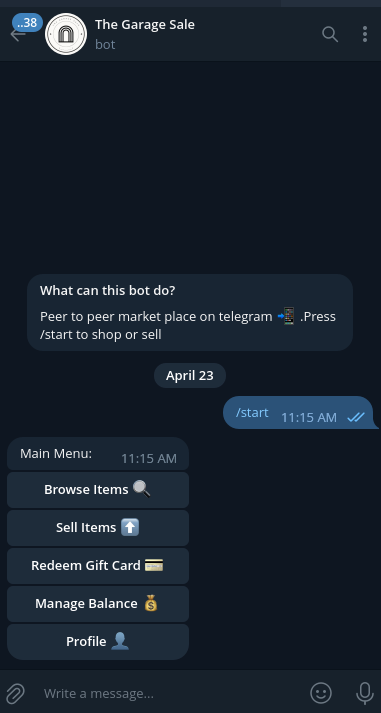

The class db is a bunch of MongoDB methods for CRUD and other functionalities. The InsertUserId method adds the users information/telegram user id to the database if it doesn't exist or if its a new user. the stateUpdate() method is a method for tracking what exactly the user is doing in the bot, it is very useful for implementation later

In [ ]:
@bot.on_message(filters.command('start') & filters.private)
def MainMenu(Client, message):
    message.reply(
        "Main Menu: ",
        reply_markup=InlineKeyboardMarkup(
            [
                [InlineKeyboardButton('Browse Items 🔍', callback_data='browse_items')],
                [InlineKeyboardButton('Sell Items ⬆️ ', callback_data='list_items')],
                [InlineKeyboardButton('Redeem Gift Card 💳', callback_data='redeem gift card')],
                [InlineKeyboardButton('Manage Balance 💰', callback_data='balance')],
                [InlineKeyboardButton('Profile 👤', callback_data='profile')]
            ]
        )
    )

    db.InsertUserId(message.from_user.id)
    db.stateUpdate(message.from_user.id, 'start')
    #deleteHistory(message.chat.id, Client)
    #db.userUpdate(id, "messageID", "")

The ListItems() method is used to help users sell items or upload items for sale

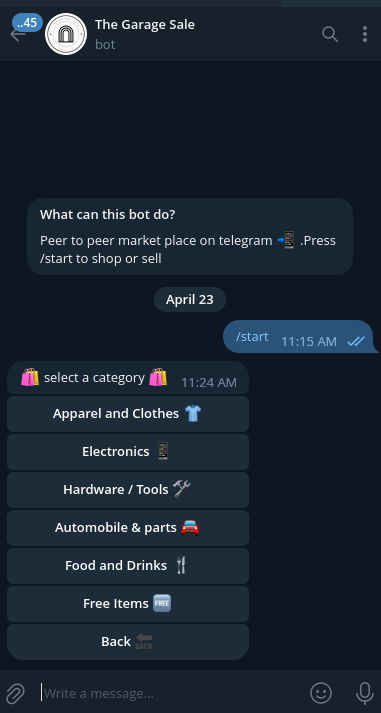

In [ ]:
def ListItems(Client, CallBackQuery):
    Client.delete_messages(chat_id=CallBackQuery.from_user.id, message_ids=CallBackQuery.message.id)
    Client.send_message(CallBackQuery.from_user.id,
                        "🛍 select a category 🛍",
                        reply_markup=InlineKeyboardMarkup(
                            [
                                [InlineKeyboardButton('Apparel and Clothes 👕', callback_data='List Apparel')],
                                [InlineKeyboardButton('Electronics 📱', callback_data='List Electronics')],
                                [InlineKeyboardButton('Hardware / Tools 🛠', callback_data='List Hardware Tools')],
                                [InlineKeyboardButton('Automobile & parts 🚘', callback_data='List Automobile')],
                                [InlineKeyboardButton('Food and Drinks 🍴', callback_data='List Food and Drinks')],
                                [InlineKeyboardButton('Free Items 🆓', callback_data='List Free')],
                                [InlineKeyboardButton('Back 🔙', callback_data='back')]
                            ]
                        )
                        )


The CallBack fucntion is used for event handling across the bot. It contains the conditional statements to handle a task for when buttons are pressed in the bot

In [ ]:
@bot.on_callback_query()
def Callback(Client, CallBackQuery):

  #This code runs when the 'browse' button is clicked 
    if CallBackQuery.data == 'browse_items':
        db.userUpdate(CallBackQuery.from_user.id, "onProfile", 0)
        CallBackQuery.edit_message_text(
            "Browse: ",
            reply_markup=InlineKeyboardMarkup(
                [
                    [InlineKeyboardButton('Apparel and Clothes 👕', callback_data='Apparel')],
                    [InlineKeyboardButton('Electronics 📱', callback_data='Electronics')],
                    [InlineKeyboardButton('Hardware / Tools 🛠', callback_data='Hardware Tools')],
                    [InlineKeyboardButton('Automobile & parts 🚘', callback_data='Automobile')],
                    [InlineKeyboardButton('Food and Drinks 🍴', callback_data='Food and drinks')],
                    [InlineKeyboardButton('Free Items 🆓', callback_data='free')],
                    [InlineKeyboardButton('✨ For You ✨', callback_data='fyp')],
                    [InlineKeyboardButton('Back 🔙', callback_data='back')]
                ]
            )
        )
        db.stateUpdate(CallBackQuery.from_user.id, 'browse')

  # This function runs when the list items button is clicked. It calls the ListItems() method
    elif CallBackQuery.data == 'list_items':
        ListItems(Client, CallBackQuery)
        db.stateUpdate(CallBackQuery.from_user.id, 'List items')

 # Code for reddeming gift cards, the idea being giftcard codes stored in the db and when the user inputs it in the 
 # text field after navigating to the reddem gift card menu, the program cross checks and if the code is available in
 # the database then the users balance is updated and that specific gift card code is then deleted from the database
 # this functionality is not complete and is on an idea basis

    elif CallBackQuery.data == 'redeem gift card':
        Client.delete_messages(chat_id=CallBackQuery.from_user.id, message_ids=CallBackQuery.message.id)
        Client.send_message(CallBackQuery.from_user.id,
                            "🚧 Gift cards redemption is not yet available 🚧",
                            reply_markup=InlineKeyboardMarkup(
                                [
                                    [InlineKeyboardButton('Back 🔙', callback_data='back')]
                                ]
                            )
                            )
        db.stateUpdate(CallBackQuery.from_user.id, 'redeem gift card')

  # Displays a panel to top up balance and to check your balance. 
    elif CallBackQuery.data == 'balance':
        Client.delete_messages(chat_id=CallBackQuery.from_user.id, message_ids=CallBackQuery.message.id)
        Client.send_message(CallBackQuery.from_user.id,
                            "💲 Manage your balances 💲",
                            reply_markup=InlineKeyboardMarkup(
                                [
                                    [InlineKeyboardButton('Top Up Balance 💰', callback_data='topup')],
                                    [InlineKeyboardButton('Check balance 💵', callback_data='check balance')],
                                    [InlineKeyboardButton('Back 🔙', callback_data='back')]
                                ]
                            )
                            )
        db.stateUpdate(CallBackQuery.from_user.id, 'manage balance')

  # Displays a panel to present the user with choices of deposit methods.

    elif CallBackQuery.data == 'topup':
        Client.delete_messages(chat_id=CallBackQuery.from_user.id, message_ids=CallBackQuery.message.id)
        Client.send_message(CallBackQuery.from_user.id,
                            "select payment method",
                            reply_markup=InlineKeyboardMarkup(
                                [
                                    [InlineKeyboardButton('🟪 CBE BIRR 🟪', callback_data='cbebirr')],
                                    [InlineKeyboardButton('Back 🔙', callback_data='back')]
                                ]
                            )
                            )
        db.stateUpdate(CallBackQuery.from_user.id, 'topup balance')


  # When the user selects cbebirr as a payment method it prompts the user to enter the amount through the chat and then transfers the code process
  # and also updates the user state to cbe_birr on the database

    elif CallBackQuery.data == "cbebirr":
        db.stateUpdate(CallBackQuery.from_user.id, "cbe_birr")
        Client.delete_messages(chat_id=CallBackQuery.from_user.id, message_ids=CallBackQuery.message.id)
        sendMessageWithoutButton(Client, CallBackQuery.message, "Enter amount to deposit through the chat")

  # Displays the current balance for that specific user and prompts the user to topup their balance or go back to the main menu

    elif CallBackQuery.data == "check balance":
        Client.delete_messages(chat_id=CallBackQuery.from_user.id, message_ids=CallBackQuery.message.id)
        Client.send_message(CallBackQuery.from_user.id,
                            "💳 Your balance is ETB " + str(db.GetBalance(
                                CallBackQuery.from_user.id)) + ". Press \'topup\' to add to your balance or \'back\' to exit",
                            reply_markup=InlineKeyboardMarkup(
                                [
                                    [InlineKeyboardButton('Top Up Balance 💰', callback_data='topup')],
                                    [InlineKeyboardButton('Back 🔙', callback_data='back')]
                                ]
                            )
                            )
        db.stateUpdate(CallBackQuery.from_user.id, 'check balance')

  # The codes and statements used to display listings as per the categories selected by the user.
  # There is a master function that is the backbone to this part which is the send() method which will be explained later
  # and the sortandreply() function which wors hand in hand with the send() function

    elif CallBackQuery.data == 'Apparel':
        send('Apparel and clothes', CallBackQuery, Client, 0, 0)
        db.stateUpdate(CallBackQuery.from_user.id, 'Browse apparel')
        Browse = db.userGet(CallBackQuery.from_user.id, 'ApparelBrowse')
        Browse += 1
        db.analyticsUpdate(CallBackQuery.from_user.id, 'ApparelBrowse', Browse)

    elif CallBackQuery.data == 'Electronics':
        send('Electronics', CallBackQuery, Client, 0, 0)
        db.stateUpdate(CallBackQuery.from_user.id, 'Browse electronics')
        Browse = db.userGet(CallBackQuery.from_user.id, 'ElectronicsBrowse')
        Browse += 1
        db.analyticsUpdate(CallBackQuery.from_user.id, 'ElectronicsBrowse', Browse)

    elif CallBackQuery.data == 'Hardware Tools':
        send('Hardware/tools', CallBackQuery, Client, 0, 0)
        db.stateUpdate(CallBackQuery.from_user.id, 'Browse hardware tools')
        Browse = db.userGet(CallBackQuery.from_user.id, 'HardwareToolsBrowse')
        Browse += 1
        db.analyticsUpdate(CallBackQuery.from_user.id, 'HardwareToolsBrowse', Browse)

    elif CallBackQuery.data == 'Automobile':
        send('Automobile & parts', CallBackQuery, Client, 0, 0)
        db.stateUpdate(CallBackQuery.from_user.id, 'Browse automobile')
        Browse = db.userGet(CallBackQuery.from_user.id, 'AutomobileBrowse')
        Browse += 1
        db.analyticsUpdate(CallBackQuery.from_user.id, 'AutomobileBrowse', Browse)

    elif CallBackQuery.data == 'Food and drinks':
        send('Food and Drinks', CallBackQuery, Client, 0, 0)
        db.stateUpdate(CallBackQuery.from_user.id, 'Browse food drinks')
        Browse = db.userGet(CallBackQuery.from_user.id, 'FoodAndDrinksBrowse')
        Browse += 1
        db.analyticsUpdate(CallBackQuery.from_user.id, 'FoodAndDrinksBrowse', Browse)
  
  # The FYP page part is incompete however the algorithm calculation is done in the db file

    elif CallBackQuery.data == 'fyp':
        #send('', CallBackQuery, Client, 0, 2)
        ForYouPage(Client, CallBackQuery, 'Apparel and clothes', 0, 0)
        db.stateUpdate(CallBackQuery.from_user.id, 'Browse fyp')

  # The following codes are used to help facilitate the listing of items to the bot
  # the lising process is not completed here though, it is completed in a later function we will see in the bottom
  # the db.analyticsUpdate() method is simply a counter for how many times a person visited places in the bot and it is later used
  # for the FYP algorithm later on. db.UserGet() methods gets stuff/data from the database as specified from the parameters

    elif CallBackQuery.data == 'List Apparel':
        db.userUpdate(CallBackQuery.from_user.id, "price", 0)
        db.stateUpdate(CallBackQuery.from_user.id, 'List Apparel')
        Client.delete_messages(chat_id=CallBackQuery.from_user.id, message_ids=CallBackQuery.message.id)
        Client.send_message(CallBackQuery.from_user.id,
                            "🟢 send a product description and image 🟢 \n\n send 1 image with your product description as caption \n\n product description must be > 10 characters \n\n If you send multiple pictures the last one will be used.",
                            reply_markup=InlineKeyboardMarkup(
                                [
                                    [InlineKeyboardButton('Back 🔙', callback_data='back')]
                                ]
                            )
                            )
        Browse = db.userGet(CallBackQuery.from_user.id, 'ListItemsCount')
        Browse += 1
        db.analyticsUpdate(CallBackQuery.from_user.id, 'ListItemsCount', Browse)

    elif CallBackQuery.data == 'List Electronics':
        db.userUpdate(CallBackQuery.from_user.id, "price", 0)
        db.stateUpdate(CallBackQuery.from_user.id, 'List Electronics')
        Client.delete_messages(chat_id=CallBackQuery.from_user.id, message_ids=CallBackQuery.message.id)
        Client.send_message(CallBackQuery.from_user.id,
                            "🟢 send a product description and image 🟢 \n\n send 1 image with your product description as caption \n\n product description must be > 10 characters \n\n If you send multiple pictures the last one will be used.",
                            reply_markup=InlineKeyboardMarkup(
                                [
                                    [InlineKeyboardButton('Back 🔙', callback_data='back')]
                                ]
                            )
                            )
        Browse = db.userGet(CallBackQuery.from_user.id, 'ListItemsCount')
        Browse += 1
        db.analyticsUpdate(CallBackQuery.from_user.id, 'ListItemsCount', Browse)

    elif CallBackQuery.data == 'List Hardware Tools':
        db.userUpdate(CallBackQuery.from_user.id, "price", 0)
        db.stateUpdate(CallBackQuery.from_user.id, 'List Hardware Tools')
        Client.delete_messages(chat_id=CallBackQuery.from_user.id, message_ids=CallBackQuery.message.id)
        Client.send_message(CallBackQuery.from_user.id,
                            "🟢 send a product description and image 🟢 \n\n send 1 image with your product description as caption \n\n product description must be > 10 characters \n\n If you send multiple pictures the last one will be used.",
                            reply_markup=InlineKeyboardMarkup(
                                [
                                    [InlineKeyboardButton('Back 🔙', callback_data='back')]
                                ]
                            )
                            )
        Browse = db.userGet(CallBackQuery.from_user.id, 'ListItemsCount')
        Browse += 1
        db.analyticsUpdate(CallBackQuery.from_user.id, 'ListItemsCount', Browse)

    elif CallBackQuery.data == 'List Automobile':
        db.userUpdate(CallBackQuery.from_user.id, "price", 0)
        db.stateUpdate(CallBackQuery.from_user.id, 'List Automobile')
        Client.delete_messages(chat_id=CallBackQuery.from_user.id, message_ids=CallBackQuery.message.id)
        Client.send_message(CallBackQuery.from_user.id,
                            "🟢 send a product description and image 🟢 \n\n send 1 image with your product description as caption \n\n product description must be > 10 characters \n\n If you send multiple pictures the last one will be used.",
                            reply_markup=InlineKeyboardMarkup(
                                [
                                    [InlineKeyboardButton('Back 🔙', callback_data='back')]
                                ]
                            )
                            )
        Browse = db.userGet(CallBackQuery.from_user.id, 'ListItemsCount')
        Browse += 1
        db.analyticsUpdate(CallBackQuery.from_user.id, 'ListItemsCount', Browse)

    elif CallBackQuery.data == 'List Food and Drinks':
        db.userUpdate(CallBackQuery.from_user.id, "price", 0)
        db.stateUpdate(CallBackQuery.from_user.id, 'List Food and Drinks')
        Client.delete_messages(chat_id=CallBackQuery.from_user.id, message_ids=CallBackQuery.message.id)
        Client.send_message(CallBackQuery.from_user.id,
                            "🟢 send a product description and image 🟢 \n\n send 1 image with your product description as caption \n\n product description must be > 10 characters \n\n If you send multiple pictures the last one will be used.",
                            reply_markup=InlineKeyboardMarkup(
                                [
                                    [InlineKeyboardButton('Back 🔙', callback_data='back')]
                                ]
                            )
                            )
        Browse = db.userGet(CallBackQuery.from_user.id, 'ListItemsCount')
        Browse += 1
        db.analyticsUpdate(CallBackQuery.from_user.id, 'ListItemsCount', Browse)

    elif CallBackQuery.data == 'List Free':
        db.userUpdate(CallBackQuery.from_user.id, "price", 0)
        db.stateUpdate(CallBackQuery.from_user.id, 'List Free')
        Client.delete_messages(chat_id=CallBackQuery.from_user.id, message_ids=CallBackQuery.message.id)
        Client.send_message(CallBackQuery.from_user.id,
                            "🟢 send a product description and image 🟢 \n\n send 1 image with your product description as caption \n\n product description must be > 10 characters \n\n If you send multiple pictures the last one will be used.",
                            reply_markup=InlineKeyboardMarkup(
                                [
                                    [InlineKeyboardButton('Back 🔙', callback_data='back')]
                                ]
                            )
                            )
        Browse = db.userGet(CallBackQuery.from_user.id, 'ListItemsCount')
        Browse += 1
        db.analyticsUpdate(CallBackQuery.from_user.id, 'ListItemsCount', Browse)

    elif CallBackQuery.data == 'free':
        send('Free items', CallBackQuery, Client, 0, 0)
        db.stateUpdate(CallBackQuery.from_user.id, 'Browse free items')
        Browse = db.userGet(CallBackQuery.from_user.id, 'FreeItemsBrowse')
        Browse += 1
        db.analyticsUpdate(CallBackQuery.from_user.id, 'FreeItemsBrowse', Browse)

  # The code used to facilitate managing of the profile, and live listings. 

    elif CallBackQuery.data == 'profile':
        db.stateUpdate(CallBackQuery.from_user.id, 'profile')
        Client.delete_messages(chat_id=CallBackQuery.from_user.id, message_ids=CallBackQuery.message.id)
        Client.send_message(CallBackQuery.from_user.id,
                            "Manage your profile 👤",
                            reply_markup=InlineKeyboardMarkup(
                                [
                                    [InlineKeyboardButton('Get all my live listings 📜',
                                                          callback_data='live listings')],
                                    [InlineKeyboardButton('Back 🔙', callback_data='back')]
                                ]
                            )
                            )
        
  # Returns active posts form the user also done using the send() method.

    elif CallBackQuery.data == 'live listings':
        db.stateUpdate(CallBackQuery.from_user.id, 'live listings')
        db.userUpdate(CallBackQuery.from_user.id, 'onProfile', 1)
        Client.delete_messages(chat_id=CallBackQuery.from_user.id, message_ids=CallBackQuery.message.id)
        Client.send_message(CallBackQuery.from_user.id, "Listings 👤 \n")
        send('', CallBackQuery, Client, 0, 1)

  # The previousPage and nextPage code is used for the page management for when people are browsing listings and when they are browsing their live listings

    elif CallBackQuery.data == 'previousPage':
        Skip = db.userGet(CallBackQuery.from_user.id, "skip")
        Skip -= 1
        db.userUpdate(CallBackQuery.from_user.id, "skip", Skip)
        Skip = db.userGet(CallBackQuery.from_user.id, "skip")
        tableName = db.userGet(CallBackQuery.from_user.id, "tableName")
        send(tableName, CallBackQuery, Client, Skip,0)

    elif CallBackQuery.data == 'nextPage':
        Skip = db.userGet(CallBackQuery.from_user.id, "skip")
        Skip += 1
        db.userUpdate(CallBackQuery.from_user.id, "skip", Skip)
        Skip = db.userGet(CallBackQuery.from_user.id, "skip")
        print(Skip)
        tableName = db.userGet(CallBackQuery.from_user.id, "tableName")
        send(tableName, CallBackQuery, Client, Skip,0)

  # when the user presses the back button then 1 of the following 2 conditions are ran.
  # the 'back' condition will delete the last message and navigates to the main menu
  # the 'backWithHistory' will navigate back to the main menu but will not delete the last message
  # the 'backWithHistory' is used when the last message was something important like a transaction code or notification

    elif CallBackQuery.data == 'back':
        setToZero(0, CallBackQuery.from_user.id, CallBackQuery.message, CallBackQuery.message.id, Client)

    elif CallBackQuery.data == 'backWithHistory':
        setToZero(1, CallBackQuery.from_user.id, CallBackQuery.message, CallBackQuery.message.id, Client)

  # The numbers buttons are used to help pick prices for listings before they are posted. The reason buttons are used
  # and not plain text is to prevent a lot of error handling code to when the user inputs a special character or a non
  # integer string

    elif CallBackQuery.data == 'one':
        setPriceAndBoost(CallBackQuery.from_user.id, 1)

    elif CallBackQuery.data == 'ten':
        setPriceAndBoost(CallBackQuery.from_user.id, 10)

    elif CallBackQuery.data == 'hundred':
        setPriceAndBoost(CallBackQuery.from_user.id, 100)

    elif CallBackQuery.data == 'thousand':
        setPriceAndBoost(CallBackQuery.from_user.id, 1000)

    elif CallBackQuery.data == 'ten thousand':
        setPriceAndBoost(CallBackQuery.from_user.id, 10000)

    elif CallBackQuery.data == 'hundred thousand':
        setPriceAndBoost(CallBackQuery.from_user.id, 100000)


  # The event handling for after the user is done picking the price.

    elif CallBackQuery.data == 'next':
        Client.delete_messages(chat_id=CallBackQuery.from_user.id, message_ids=CallBackQuery.message.id)
        Client.answer_callback_query(CallBackQuery.id, text="Done", show_alert=True)

      # The nested if statements here are responsible for posting the listings the user sent to the database

        if db.stateGet(CallBackQuery.from_user.id) == 'List Apparel Price':
            db.stateUpdate(CallBackQuery.from_user.id, 'List Apparel Price Final')

            if CheckAndConfirmBoost(Client, CallBackQuery.message) == True:
                setPost(CallBackQuery.from_user.id, 'Apparel and clothes')
                setToZero(1, CallBackQuery.from_user.id, CallBackQuery.message, CallBackQuery.message.id, Client)

        elif db.stateGet(CallBackQuery.from_user.id) == 'List Electronics Price':
            db.stateUpdate(CallBackQuery.from_user.id, 'List Electronics Price Final')

            if CheckAndConfirmBoost(Client, CallBackQuery.message) == True:
                setPost(CallBackQuery.from_user.id, 'Electronics')
                setToZero(1, CallBackQuery.from_user.id, CallBackQuery.message, CallBackQuery.message.id, Client)

        elif db.stateGet(CallBackQuery.from_user.id) == 'List Hardware Tools Price':
            db.stateUpdate(CallBackQuery.from_user.id, 'List Hardware Tools Price Final')

            if CheckAndConfirmBoost(Client, CallBackQuery.message) == True:
                setPost(CallBackQuery.from_user.id, 'Automobile & parts')
                setToZero(1, CallBackQuery.from_user.id, CallBackQuery.message, CallBackQuery.message.id, Client)

        elif db.stateGet(CallBackQuery.from_user.id) == 'List Automobile Price':
            db.stateUpdate(CallBackQuery.from_user.id, 'List Automobile Price Final')

            if CheckAndConfirmBoost(Client, CallBackQuery.message) == True:
                setPost(CallBackQuery.from_user.id, 'Automobile & parts')
                setToZero(1, CallBackQuery.from_user.id, CallBackQuery.message, CallBackQuery.message.id, Client)

        elif db.stateGet(CallBackQuery.from_user.id) == 'List Food and Drinks Price':
            db.stateUpdate(CallBackQuery.from_user.id, 'List Food and Drinks Price Final')

            if CheckAndConfirmBoost(Client, CallBackQuery.message) == True:
                setPost(CallBackQuery.from_user.id, 'Food and Drinks')
                setToZero(1, CallBackQuery.from_user.id, CallBackQuery.message, CallBackQuery.message.id, Client)

        else:
            db.stateUpdate(CallBackQuery.from_user.id, 'List Free Final')
            if CheckAndConfirmBoost(Client, CallBackQuery.message) == True:
                setPost(CallBackQuery.from_user.id, 'Free items')
                setToZero(0, CallBackQuery.from_user.id, CallBackQuery.message, CallBackQuery.message.id, Client)

  # Event handling for the 'done' button when the user is picking to boost the post and then follows the 'skip' button to skip the boost part altogether

    elif CallBackQuery.data == 'done':
        db.stateUpdate(CallBackQuery.from_user.id, 'Boost done')

    elif CallBackQuery.data == 'skip':
        db.stateUpdate(CallBackQuery.from_user.id, "skip boost")

  # Displays information for when the user wants to know how to make a deposit

    elif CallBackQuery.data == 'how_to_deposit':
        sendMessageWithoutButton(Client, CallBackQuery.message,
                                 "Step 1\n\nDial *847# and select the \"Pay Bill\" option from the menu (Reply 5)\n\nStep 2\n\n\nSelect the \"Input Short Code\" option from the menu (Reply 2) and enter Short Code 251997 when asked.)\n\nStep 3\n\n\nYou will be asked to enter the Bill Reference Number. Enter your order code that we sent you.\n\nStep 4\n\n\nYou will be shown the order details and will be asked to confirm the payment. Verify the details and confirm the transaction.\n\nStep 5\n\n\nEnter your CBE-Birr PIN code when asked and you will receive a SMS from CBE notifying you that your payment is being processed. When the payment is completed, We will notify you of your completed transaction and update your balance.")
        CallBackQuery.edit_message_text(CallBackQuery.message.text)

    else:

      # code to handle events for buttons that were generated by the program.

        onProfile = db.userGet(CallBackQuery.from_user.id, "onProfile")
        if (onProfile == 0):

          # if onProfile is 0 it means the user is browsing already listed posts

          # list is the names of tables on the database

            list = ["Apparel and clothes", "Automobile & parts", "Electronics", "Food and Drinks", "Free items",
                    "Hardware/tools"]

            dbo = db.cluster['thegaragesale']
            Client.answer_callback_query(CallBackQuery.id, text="seller is notified, they will message you soon",
                                         show_alert=True)
            for i in list:

              # The code in this loop facilitates what happenes when the user clicks 'purchase item' button and notifies the seller on the potential sale
              # the way we filter the documents is if the document id from the mongoDB database is the same as the callBackquery then
              # that specific document is deleted from the database
                collection = dbo[i]
                X = collection.find({})
                for x in X:
                    if (db.stateGet(CallBackQuery.from_user.id) == 'Browse apparel'):
                        if CallBackQuery.data == str(
                                db.GetDocumentID('Apparel and clothes', x['Description'], x['price'])):
                            NotifyBuyerAndSeller(Client, CallBackQuery.message, CallBackQuery.from_user.id,
                                                 x['user_id'], x['Description'])
                            break

                    elif (db.stateGet(CallBackQuery.from_user.id) == 'Browse electronics'):
                        if CallBackQuery.data == str(db.GetDocumentID('Electronics', x['Description'], x['price'])):
                            NotifyBuyerAndSeller(Client, CallBackQuery.message, CallBackQuery.from_user.id,
                                                 x['user_id'], x['Description'])
                            break

                    elif (db.stateGet(CallBackQuery.from_user.id) == 'Browse hardware tools'):
                        if CallBackQuery.data == str(db.GetDocumentID('Hardware/tools', x['Description'], x['price'])):
                            NotifyBuyerAndSeller(Client, CallBackQuery.message, CallBackQuery.from_user.id,
                                                 x['user_id'], x['Description'])
                            break

                    elif (db.stateGet(CallBackQuery.from_user.id) == 'Browse food drinks'):
                        if CallBackQuery.data == str(db.GetDocumentID('Food and Drinks', x['Description'], x['price'])):
                            NotifyBuyerAndSeller(Client, CallBackQuery.message, CallBackQuery.from_user.id,x['user_id'], x['Description'])
                            break

                    elif (db.stateGet(CallBackQuery.from_user.id) == 'Browse automobile'):
                        if CallBackQuery.data == str(
                                db.GetDocumentID('Automobile & parts', x['Description'], x['price'])):
                            NotifyBuyerAndSeller(Client, CallBackQuery.message, CallBackQuery.from_user.id,x['user_id'], x['Description'])
                            break

                    elif (db.stateGet(CallBackQuery.from_user.id) == 'Browse free items'):
                        if CallBackQuery.data == str(db.GetDocumentID('Free items', x['Description'], x['price'])):
                            NotifyBuyerAndSeller(Client, CallBackQuery.message, CallBackQuery.from_user.id,x['user_id'], x['Description'])
                            break

        elif (onProfile == 1):

          # if onProfile is 1 it means the user is browsing their own active posts and can delete them if they wish

            list = ["Apparel and clothes", "Automobile & parts", "Electronics", "Food and Drinks", "Free items",
                    "Gift cards", "Hardware/tools"]
            dbo = db.cluster["thegaragesale"]
            for i in list:

              # when the 'delete listing' button is clicked the following code is run
              # the way we filter the documents is if the document id from the mongoDB database is the same as the callBackquery then
              # that specific document is deleted from the database

                collection = dbo[i]
                X = collection.find({})
                for x in X:
                    documentID = x['_id']
                    print(CallBackQuery.data)
                    if CallBackQuery.data == str(documentID):
                        print("call back query matches")
                        db.deleteSpecificDocument(documentID)

      # This code isn't functional and is not meant to run, was left there after testing  
              
        elif(onProfile==2):
            print("talk to u later bishh")

The next cell determines what happens when a message is sent to the bot.

In [ ]:
@bot.on_message(filters.private)
def CheckAndPostListing(Client, message):
    ProductList(Client, message, 'List Apparel', 'List Apparel Price', 'List Apparel Price Final')
    ProductList(Client, message, 'List Electronics', 'List Electronics Price', 'List Electronics Price Final')
    ProductList(Client, message, 'List Hardware Tools', 'List Hardware Tools Price', 'List Hardware Tools Price Final')
    ProductList(Client, message, 'List Automobile', 'List Automobile Price', 'List Automobile Price Final')
    ProductList(Client, message, 'List Food and Drinks', 'List Food and Drinks Price',
                'List Food and Drinks Price Final')
    FreeList(Client, message, 'List Free', 'List Free Final')
    LoadBalance(Client, message, message.text)
    db.messageID(message.user.id, message.id)

The next cell works hand in hand with the previous cell

the Productlist() method checks the descriptions for a post to make sure it doesn't already exist and after also makes sure the descriptions aren't too short. 

In [ ]:
def ProductList(Client, message, primary_state, secondary_state, final_state):
    if db.stateGet(message.chat.id) == primary_state:
        try:
            if (db.exists(message.caption, primary_state)):
                sendMessage(Client, message, "⚠️ Post already exists", "Try another one", primary_state)

            elif (len(message.caption) < 10):
                sendMessage(Client, message, "⚠️ Description is too short", "Try Again", primary_state)
            else:
                db.userUpdate(message.chat.id, "description", message.caption)
                
                # To save space on the database all photos are forwarded to a telegram group and the photo_id
                # is saved on the database. when its time to retrieve it the program will check for the photo_id
                # and then forward that specifc photo from the telegram group to the bots chat.

                l = Client.send_photo(-1001654260863, message.photo.file_id)

                db.userUpdate(message.chat.id, "photo_id", message.photo.file_id)
                db.userUpdate(message.chat.id, "l_id", l.id)
                db.stateUpdate(message.chat.id, secondary_state)
        except:
            # For when an error occurs
            sendMessage(Client, message, "🔧 Unexpected error occured", "Try Again", primary_state)


    # The buttons used to set the price for items
    
    if db.stateGet(message.chat.id) == secondary_state:
        Price = db.userGet(message.chat.id, "price")
        l = Client.send_message(
            message.chat.id,
            "🛍 set a product price 🛍\n Current price is " + str(Price),
            reply_markup=InlineKeyboardMarkup(
                [
                    [InlineKeyboardButton('1', callback_data='one'),
                     InlineKeyboardButton('10', callback_data='ten')],
                    [InlineKeyboardButton('100', callback_data='hundred'),
                     InlineKeyboardButton('1000', callback_data='thousand')],
                    [InlineKeyboardButton('10000', callback_data='ten thousand'),
                     InlineKeyboardButton('100000', callback_data='hundred thousand')],
                    [InlineKeyboardButton('Back 🔙', callback_data='back'),
                     InlineKeyboardButton('Next 🔜', callback_data='next')]
                ]
            )
        )
        while (db.stateGet(message.chat.id) == secondary_state):
            if db.userGet(message.chat.id, "price") != Price and l.id != None:
                Client.delete_messages(chat_id=message.chat.id, message_ids=l.id)
                CheckAndPostListing(Client, message)
                Client.delete_messages(chat_id=message.chat.id, message_ids=l.id)
            elif (db.stateGet(message.chat.id) == final_state):
                break


The cell below is the same as the cell above except there isn't a functionality to select price.

In [ ]:
def FreeList(Client, message, primary_state, final_state):
    if db.stateGet(message.chat.id) == primary_state:
        try:
            if (len(message.caption) < 10):
                sendMessage(Client, message, "Description is too short", "Try Again", primary_state)
            else:
                db.userUpdate(message.chat.id, "description", message.text)
                db.stateUpdate(message.chat.id, final_state)
                Client.send_message(
                    message.chat.id,
                    "🛍 Choose to proceed 🛍 Price is \'Free\'",
                    reply_markup=InlineKeyboardMarkup(
                        [[InlineKeyboardButton('Back 🔙', callback_data='back'),
                          InlineKeyboardButton('Next 🔜', callback_data='next')]
                         ]
                    )
                )
        except TypeError:
            sendMessage(Client, message, "⚠️ Please send an image with description as caption ⚠️", "Try Again",
                        primary_state)


The cell below is used to delete all historical messages sent by the bot. The idea for this is to make the user experience more smooth with less clutter. This method would ideally be called when the user navigates back to the main menu. It has minor issues at the moment and isn't fully functional

In [ ]:
def deleteHistory(id, client):
    dbo = db.cluster['thegaragesale']
    collection = dbo['User_Id']
    col = collection.find({'user id': id})
    for cl in col:
        msgID = cl['messageID']
        msgID.split()
    for i in msgID:
        if(msgID[i] != " "):
            #message.delete(message.chat.id, i)
            client.delete_messages(chat_id=id, message_ids=msgID[i])
            db.userUpdate(id, "messageID", "")

The send() method is used to retrieve data from the database and then display them on the chat. used for the 'GetLiveListings' functionality and also used to get lisings for all categories. onProfile is used to differentiate between browsing other peoples listings and browsing your own listings. if it is 0 then it is the code for when the user is browsing other peoples listing. if it is 1 then the user is browsing their own listings.

In [ ]:
def send(TableName, CallBackQuery, Client, Skip, onProfile):
    db.userUpdate(CallBackQuery.from_user.id, "tableName", TableName)
    dbo = db.cluster['thegaragesale']
    if (onProfile == 0):
        collection = dbo[str(TableName)]
        leng = collection.count_documents({})
        if (leng % 2 == 0):
            size = int(leng / 10)
        else:
            size = int((leng / 10) + 1)
        j = 0
        X = collection.find({}).skip(10 * Skip)

        # sortAndReply(Client, CallBackQuery, X, TableName, j,0)
        arr = []
        for x in X:
            thisdict = dict(Id=x['_id'], Boost=x['boost'])
            arr.append(thisdict)
        l = sorted(arr, key=itemgetter('Boost'), reverse=True)
        d1 = []
        d2=[]
        for x in arr:
            if(x['Boost']>0):
                d2.append(1)
            elif(x['Boost']==0):
                d2.append(0)
        for i in l:
            d1.append(i['Id'])

        if(Skip==0):
            sortAndReply(Client, CallBackQuery, d1[Skip * 10:((Skip + 1) * 11) - 1], TableName, j, 0, d2[Skip * 10:((Skip + 1) * 11) - 1])
        else:
            sortAndReply(Client, CallBackQuery, d1, TableName, j, 0,d2)


        if (Skip == 0 and size > 1):
            Client.send_message(CallBackQuery.from_user.id, "Page " + str(Skip + 1),
                                reply_markup=InlineKeyboardMarkup(
                                    [[InlineKeyboardButton('Next Page 🔜', callback_data='nextPage')],
                                     [InlineKeyboardButton('Back to main Menu 🔙', callback_data='back')]
                                     ]
                                )
                                )

        elif (Skip < size - 1):
            Client.send_message(CallBackQuery.from_user.id, "Page " + str(Skip + 1),
                                reply_markup=InlineKeyboardMarkup(
                                    [[InlineKeyboardButton('Previous Page 🔙', callback_data='previousPage'),
                                      InlineKeyboardButton('Next Page 🔜', callback_data='nextPage')],
                                     [InlineKeyboardButton('Back to main Menu 🔙', callback_data='back')]
                                     ]
                                )
                                )

        elif (size > 1):
            Client.send_message(CallBackQuery.from_user.id, "Page " + str(Skip + 1),
                                reply_markup=InlineKeyboardMarkup(
                                    [[InlineKeyboardButton('Previous Page 🔙', callback_data='previousPage')],
                                     [InlineKeyboardButton('Back to main menu 🔙', callback_data='back')]
                                     ]
                                )
                                )

        else:
            Client.send_message(CallBackQuery.from_user.id, "Back to main Menu",
                                reply_markup=InlineKeyboardMarkup(
                                    [[InlineKeyboardButton('Back 🔙', callback_data='back')
                                      ]
                                     ]
                                )
                                )
    elif(onProfile==1):
        list = ["Apparel and clothes", "Automobile & parts", "Electronics", "Food and Drinks", "Free items",
                "Gift cards", "Hardware/tools"]
        leng = 0
        for i in list:
            collection = dbo[str(i)]
            leng += collection.count_documents({"user_id": CallBackQuery.from_user.id})
        if (leng % 10 == 0):
            size = int(leng / 10)
        else:
            size = int((leng / 10) + 1)

        for li in list:
            j = 0
            collection = dbo[str(li)]
            x = collection.find({"user_id": CallBackQuery.from_user.id}).skip(10 * Skip)
            sortAndReply(Client, CallBackQuery, x, li, j, 1)

        if (Skip == 0 and size > 1):
            Client.send_message(CallBackQuery.from_user.id, "Page " + str(Skip + 1),
                                reply_markup=InlineKeyboardMarkup(
                                    [[InlineKeyboardButton('Next Page 🔜', callback_data='nextPage')],
                                     [InlineKeyboardButton('Back to main Menu 🔙', callback_data='back')]
                                     ]
                                )
                                )

        elif (Skip < size - 1):
            Client.send_message(CallBackQuery.from_user.id, "Page " + str(Skip + 1),
                                reply_markup=InlineKeyboardMarkup(
                                    [[InlineKeyboardButton('Previous Page 🔙', callback_data='previousPage'),
                                      InlineKeyboardButton('Next Page 🔜', callback_data='nextPage')],
                                     [InlineKeyboardButton('Back to main Menu 🔙', callback_data='back')]
                                     ]
                                )
                                )

        elif (size > 1):
            Client.send_message(CallBackQuery.from_user.id, "Page " + str(Skip + 1),
                                reply_markup=InlineKeyboardMarkup(
                                    [[InlineKeyboardButton('Previous Page 🔙', callback_data='previousPage')],
                                     [InlineKeyboardButton('Back to main menu 🔙', callback_data='back')]
                                     ]
                                )
                                )

        else:
            Client.send_message(CallBackQuery.from_user.id, "Back to main Menu",
                                reply_markup=InlineKeyboardMarkup(
                                    [[InlineKeyboardButton('Back 🔙', callback_data='back')
                                      ]
                                     ]
                                )
                                )
    else:
        db.getAnalytics(CallBackQuery.from_user.id,)

The sort and reply method is used to display the fetched items from the database and arranges them in a way they are understandable to the user.

In [ ]:
def sortAndReply(Client, CallBackQuery, X, TableName, j, onProfile,X1):
    if (onProfile == 0):
        while (j < len(X)):
            l = int(re.split("\s", db.get(TableName, X[j]))[0])
            d =  db.getDescription(TableName,X[j])
            p =int( re.split("\s", db.get(TableName, X[j]))[1])
            u = int(re.split("\s", db.get(TableName, X[j]))[2])

            purchase = db.GetDocumentID(TableName, d, p)

            if(X1[j]==0):
                Client.copy_message(CallBackQuery.from_user.id, -1001654260863, l)
                Client.send_message(CallBackQuery.from_user.id,
                                    d + "\n\n\n" + "Price: " + str(p) + "\n",
                                    reply_markup=InlineKeyboardMarkup(
                                        [[InlineKeyboardButton('✔️ Purchase this', callback_data=str(purchase))
                                          ]]
                                    )
                                    )
            else:
                Client.copy_message(CallBackQuery.from_user.id, -1001654260863, l)
                Client.send_message(CallBackQuery.from_user.id,
                                    "Boosted" + "\n\n\n" +
                                    d + "\n\n\n" + "Price: " + str(p) + "\n",
                                    reply_markup=InlineKeyboardMarkup(
                                        [[InlineKeyboardButton('✔️ Purchase this', callback_data=str(purchase))
                                          ]]
                                    )
                                    )
            #db.messageID(CallBackQuery.from_user.id, CallBackQuery.message.id)

            j += 1
    else:
        for x in X:
            delete = db.GetDocumentID(str(TableName), x['Description'], x['price'])
            # db.userUpdate(CallBackQuery.from_user.id, "onProfileDescription", x['Description'])
            if (j < 10):
                db.userUpdate(CallBackQuery.from_user.id, "onProfileDescription", x['Description'])
                l = (x['l_id'])
                Client.copy_message(CallBackQuery.from_user.id, -1001654260863, l)
                Client.send_message(CallBackQuery.from_user.id,
                                    x['Description'] + "\n\n\n" + "Price: " + str(x['price']),
                                    reply_markup=InlineKeyboardMarkup(
                                        [[InlineKeyboardButton('❌ Delete this listing ❌', callback_data=str(delete))]]
                                    )
                                    )
                #print(delete)
                j += 1
                #db.messageID(CallBackQuery.from_user.id, CallBackQuery.message.id)

The Boost() method is used to help pick a boost amount similar to the price selector. The idea of boosted listings are the ones with the higher boost show up on the top and then the listings with no boost are shown. It is like an advertisement strategy or a way to monetize this platform

In [ ]:
def Boost(Client, message):
    db.stateUpdate(message.chat.id, "Boost")
    boost = db.userGet(message.chat.id, "boost")
    sendMessageWithoutButton(Client, message,
                             "🛍 Boost your listing so more people see it 🛍.\n\nBoosted listings will show up on the top based on how much you have bid increasing your sales. You can skip this process if you would like.")
    l = Client.send_message(
        message.chat.id,
        "Current boost is " + str(boost),
        reply_markup=InlineKeyboardMarkup(
            [
                [InlineKeyboardButton('1', callback_data='one'),
                 InlineKeyboardButton('10', callback_data='ten')],
                [InlineKeyboardButton('100', callback_data='hundred'),
                 InlineKeyboardButton('1000', callback_data='thousand')],
                [InlineKeyboardButton('10000', callback_data='ten thousand'),
                 InlineKeyboardButton('100000', callback_data='hundred thousand')],
                [InlineKeyboardButton('Back 🔙', callback_data='back'),
                 InlineKeyboardButton('Skip', callback_data='skip')],
                [InlineKeyboardButton('Done 🔜', callback_data='done')]
            ]
        )
    )
    while (db.stateGet(message.chat.id) == "Boost"):
        if db.userGet(message.chat.id, "boost") != boost:
            Client.delete_messages(chat_id=message.chat.id, message_ids=l.id)
            Boost(Client, message)
            Client.delete_messages(chat_id=message.chat.id, message_ids=l.id)
        elif (db.stateGet(message.chat.id) != "Boost"):
            break

CheckAndConfirmBoost() is the function that makes sure the user has enough balance to boost the post.

In [ ]:
def CheckAndConfirmBoost(Client, message):
    Boost(Client, message)
    BoostValue = db.userGet(message.chat.id, "boost")
    CurrentBalance = db.GetBalance(message.chat.id)
    if int(BoostValue) > int(CurrentBalance) and db.stateGet(message.chat.id) != 'skip boost':
        sendMessage(Client, message, "Balance too low for boost", "back", "back")
        db.userUpdate(message.chat.id, "boost", 0)

    elif db.stateGet(message.chat.id) == 'skip boost':
        db.userUpdate(message.chat.id, "boost", 0)
        return True

    else:
        db.UpdateBalance(message.chat.id, (CurrentBalance - BoostValue))
        return True

sendMessage() method is used to send message along with a button on the bottom

In [ ]:
def sendMessage(Client, message, Text, ButtonName, CallBack):
    Client.send_message(message.chat.id, Text,
                        reply_markup=InlineKeyboardMarkup(
                            [[InlineKeyboardButton(ButtonName, callback_data=CallBack)]])
                        )


sendMessageWithoutButton() is a methon that sends text to the user with no button in the bottom. Used for notifications and like.

In [ ]:
def sendMessageWithoutButton(Client, message, Text):
    Client.send_message(message.chat.id, Text)

NotifyBuyerAndSeller() method is used to notify the buyer and the seller with each others information when the user clicks 'purchase' button

In [ ]:
def NotifyBuyerAndSeller(Client, message, BuyerId, sellerId, description):
    # send message to the seller
    Client.send_message(sellerId,
                        Client.get_users(BuyerId).mention() + " is looking to buy your listing\n\n" + description,
                        reply_markup=InlineKeyboardMarkup(
                            [[InlineKeyboardButton("Main Menu", callback_data="backWithHistory")]])
                        )

    Client.send_message(BuyerId,
                        "The seller has been notified of your interest they will reach out to you \nor reach out to them through " + Client.get_users(
                            sellerId).mention(),
                        reply_markup=InlineKeyboardMarkup(
                            [[InlineKeyboardButton("Main Menu", callback_data="backWithHistory")]])
                        )

setToZero() is used to set all the parameters on the database being used for navigation, posting etc to 0 after they are done being used.

In [ ]:
def setToZero(withHistory, id, message, messageId, client):
    db.userUpdate(id, "tableName", "null")
    db.userUpdate(id, "skip", 0)
    db.userUpdate(id, "price", 0)
    db.userUpdate(id, "description", "")
    db.userUpdate(id, "photo_id", " ")
    db.userUpdate(id, "l_id", 0)
    db.userUpdate(id, "boost", 0)
    db.userUpdate(id, "onProfile", 0)
    # db.userUpdate(id, "messageID", "")
    db.stateUpdate(id, 'Main Menu')

    if (withHistory):
        MainMenu(client, message)
    else:
        client.delete_messages(chat_id=id, message_ids=messageId)
        MainMenu(client, message)

setPriceAndBoost() sets the price or boost on the userID table

In [ ]:
def setPriceAndBoost(id, amount):
    Price = db.userGet(id, "price")
    Boost = db.userGet(id, "boost")
    Boost += amount
    Price += amount
    if db.stateGet(id) == "Boost":
        db.userUpdate(id, "boost", Boost)
    else:
        db.userUpdate(id, "price", Price)

setPost() Posts listing on the database

In [ ]:
def setPost(userId, collection):
    Price = db.userGet(userId, "price")
    Boost = db.userGet(userId, "boost")
    Desc = db.userGet(userId, "description")
    PhotoId = db.userGet(userId, "photo_id")
    LId = db.userGet(userId, "l_id")
    db.PostListing(collection, userId, Price, Desc, PhotoId, LId, Boost)

LoadBalance() method is used to help get a transaction reference number to help the user deposit money to their account.

In [ ]:
def LoadBalance(Client, message, amount):
    import yenepay

    if (db.stateGet(message.chat.id) == 'cbe_birr'):
        sendMessage(Client, message,
                    "You will recieve a reference number to deposit in a few minutes\n\npress the button below to understand how to deposit funds to your account",
                    "How to deposit?", "how_to_deposit")
        pay = yenepay.yenepay()
        referenceNo = pay.sendMoney('phone_no', amount, str(message.chat.id))
        if (referenceNo == False):
            # Client.delete_messages(chat_id = message.chat.id, message_ids = message.id)
            sendMessage(Client, message, "Error getting your transaction reference number", "Main menu", "back")
        else:
            sendMessage(Client, message, "Dear " + Client.get_users(
                message.chat.id).mention() + " please deposit with this transaction reference no through CBE birr " + str(
                referenceNo), "Back", "backWithHistory")
            # sendMessage(Client, message, "Main menu", "Back", "back")
    else:
        pass

ForYouPage() method is not yet complete

In [ ]:
def ForYouPage(Client, CallBackQuery, TableName, skip, onProfile):
    
    send(TableName, CallBackQuery, Client, skip, onProfile)

The cell below runs the entire code 

In [ ]:
print("Running...")
bot.run()